In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
sales_df = pd.read_csv('/content/Regression_StoreSales.csv')
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sales_df.shape

(14204, 12)

In [ ]:
sales_df.drop_duplicates(inplace=True)

In [ ]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [ ]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
sales_df.dropna(inplace=True)

In [ ]:
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### EDA:

In [ ]:
cat_df = sales_df.select_dtypes(include='object')
num_df = sales_df.select_dtypes(exclude='object')

In [ ]:
cat_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

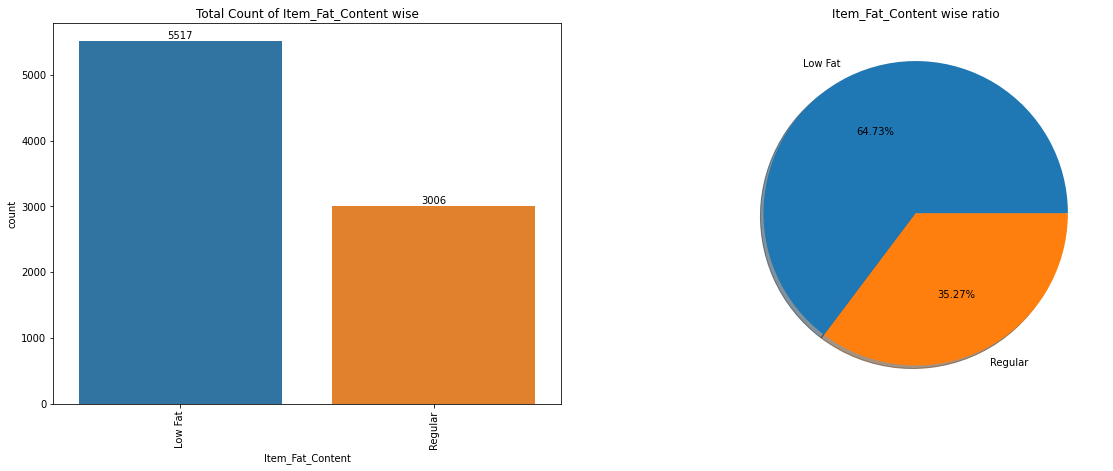

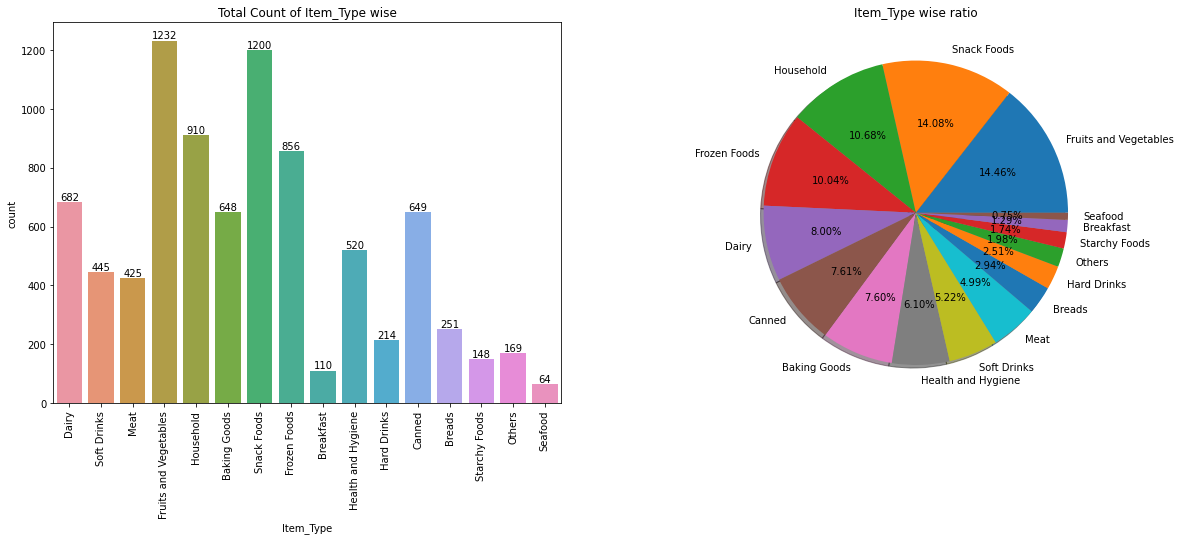

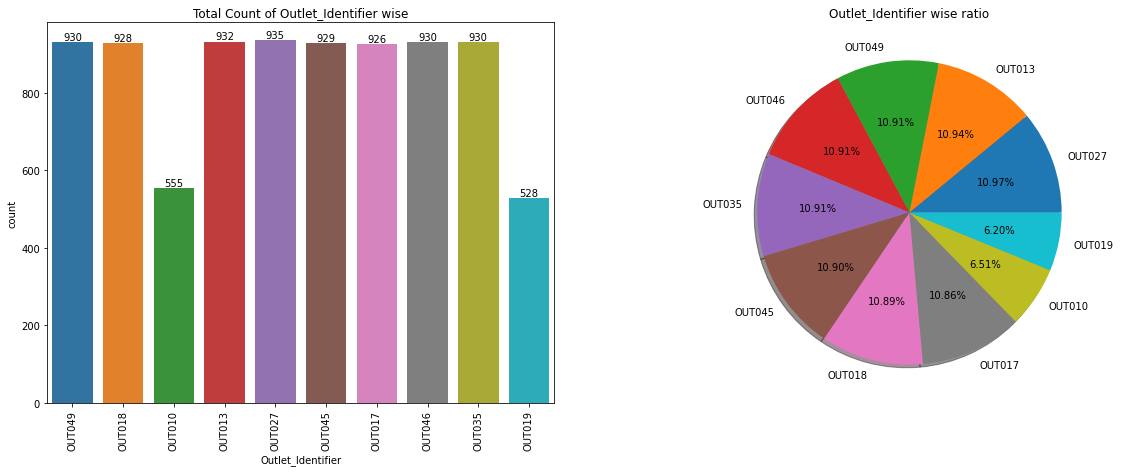

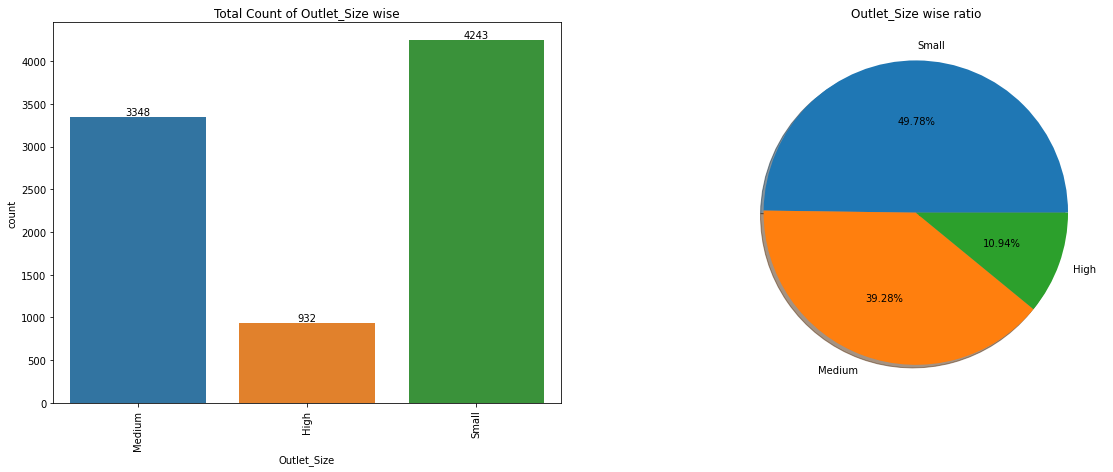

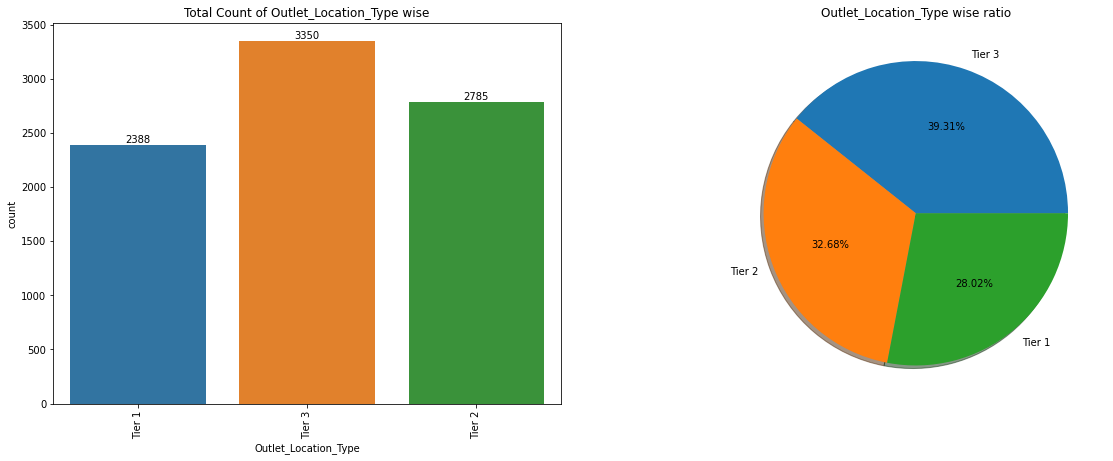

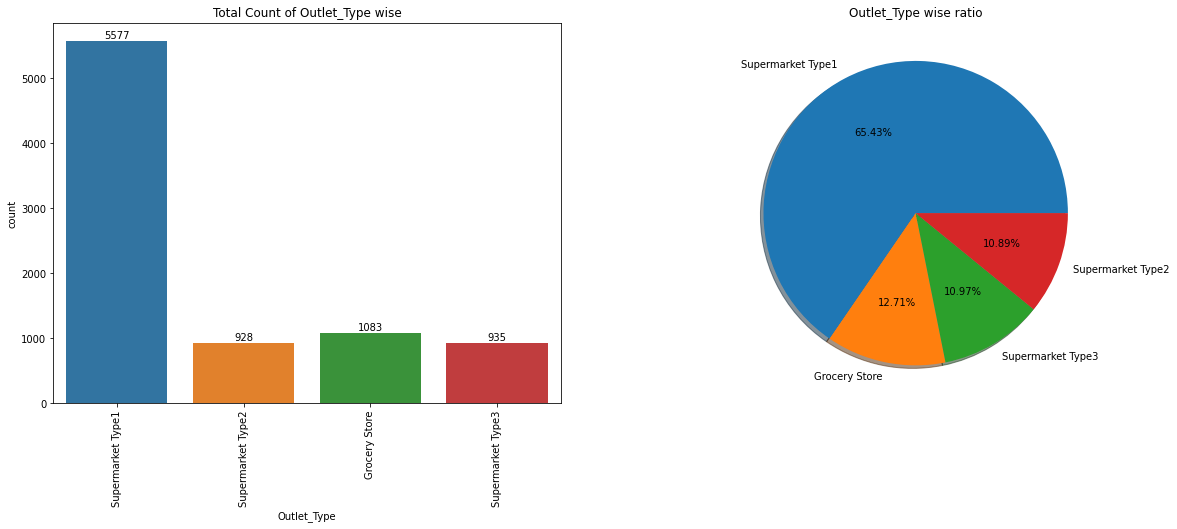

In [ ]:
for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  plt.figure(figsize = (20,7))
  plt.subplot(1,2,1)
  ax = sb.countplot(x = cat_df[i])
  for bar in ax.patches:
    count = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(count, (x,y), va = 'bottom', ha = 'center')
    plt.title(f'Total Count of {i} wise');
    plt.xticks(rotation=90);

  plt.subplot(1,2,2)
  labels = list(cat_df[i].value_counts().index)
  plt.pie(cat_df[i].value_counts(), labels = labels, autopct= "%0.2f%%", shadow = True);
  plt.title(f'{i} wise ratio');

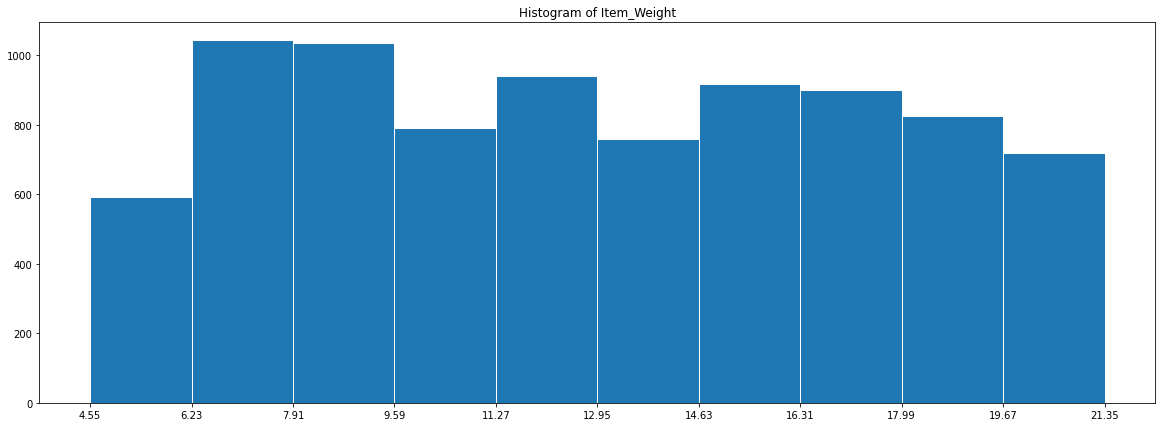

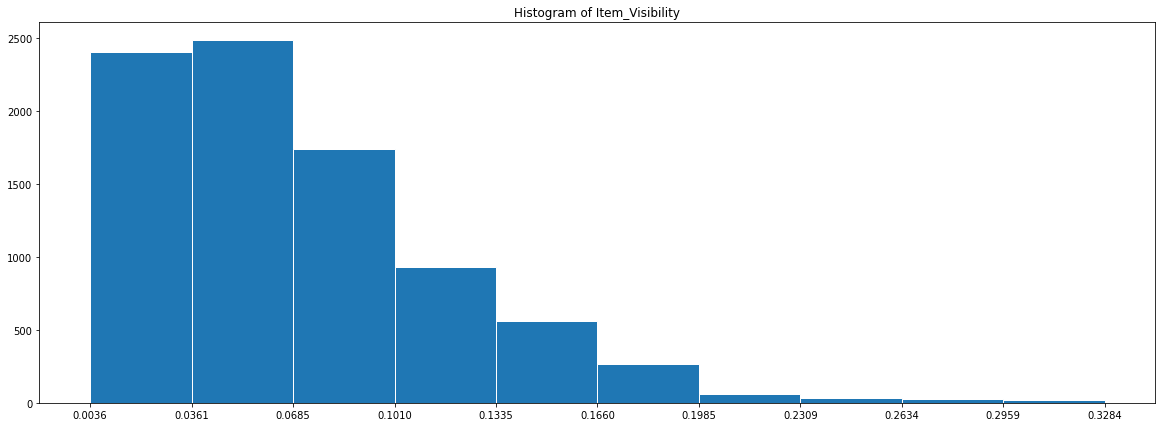

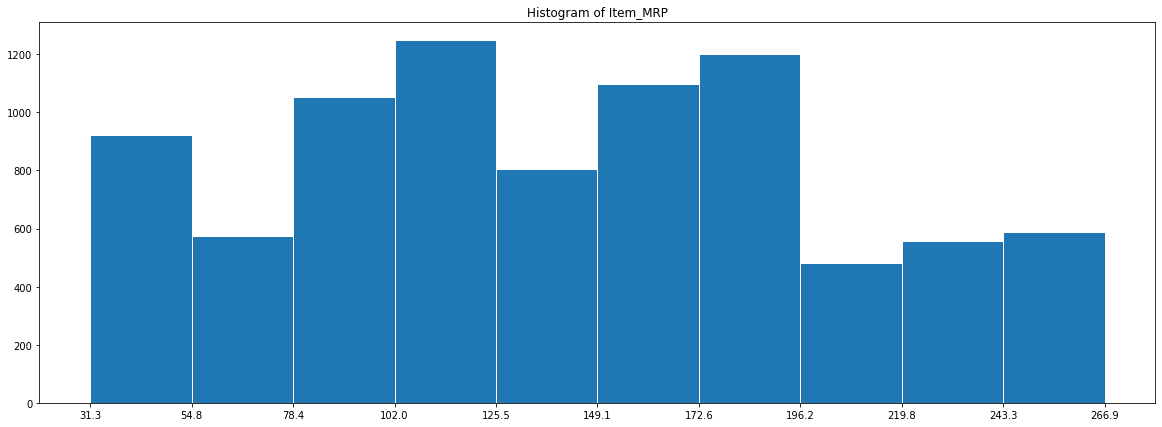

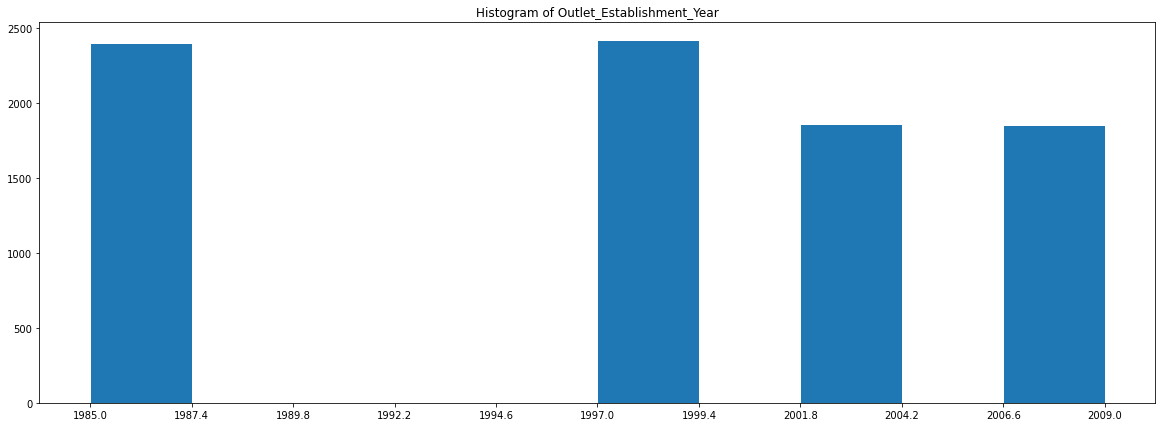

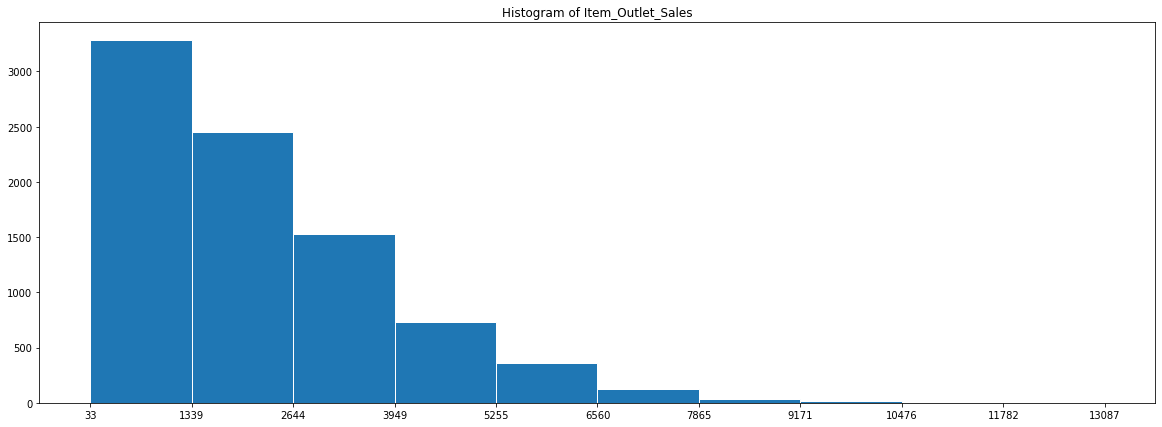

In [ ]:
for i in num_df.columns:
  plt.figure(figsize=(20,7))
  n,bins,patches = plt.hist(sales_df[i], edgecolor = 'white')
  plt.title(f'Histogram of {i}')
  plt.xticks(bins)
  plt.show()

In [ ]:
file_name = 'Store_Sales_Data_Tableau.xlsx'

In [ ]:
sales_df.to_excel(file_name)

In [ ]:
sales_df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

### LABEL ENCODING:

In [ ]:
copy_df = sales_df.copy()
copy_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

for i in cat_df.columns:
  copy_df[i] = lbl_encoder.fit_transform(copy_df[i])

copy_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


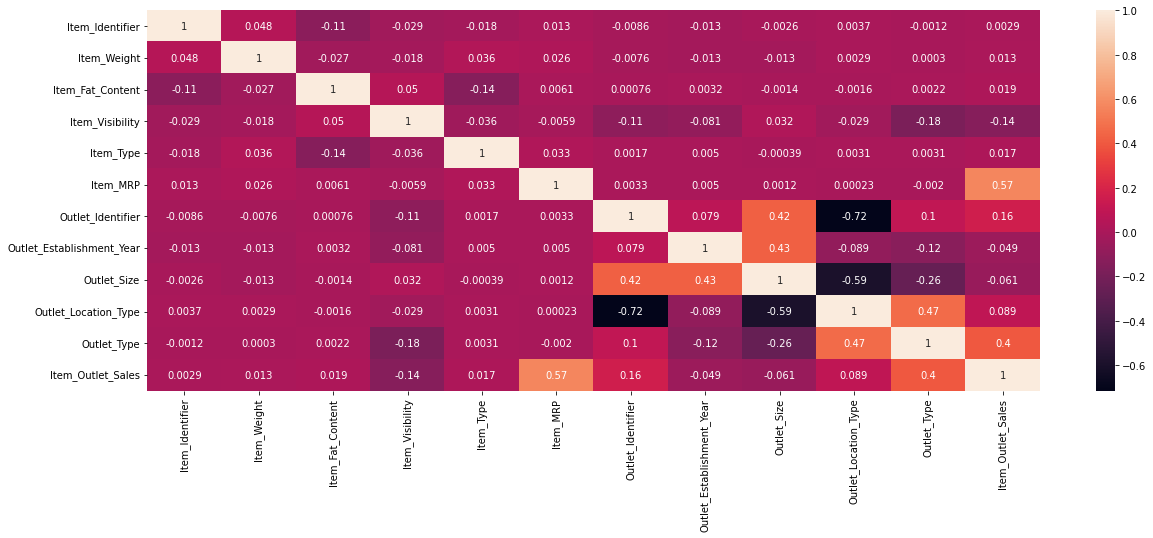

In [ ]:
plt.figure(figsize=(20,7))
sb.heatmap(copy_df.corr(), annot=True)
plt.show()

In [ ]:
copy_df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

## SCALING:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(copy_df), columns = copy_df.columns)
df_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.163812,0.866667,0.777729,0.111111,0.0,1.0,0.333333,0.210293
8519,0.227746,1.0,0.133638,0.000000,0.326263,0.777778,1.0,0.5,0.333333,0.039529
8520,0.359929,0.0,0.097321,0.533333,0.228492,0.666667,1.0,0.5,0.333333,0.088850
8521,0.158083,1.0,0.436080,0.866667,0.304939,0.333333,0.5,1.0,0.666667,0.138835


In [ ]:
df_scaled.drop('Item_Outlet_Sales', axis = 1, inplace=True)

Best features:

1. Item_MRP
2. Outlet_Identifier
3. Outlet_Size
4. Outlet_Location_Type
5. Outlet_Type

## Splitting the Columns:

For Selective Columns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = copy_df['Item_Outlet_Sales']
x = df_scaled.iloc[:,4:9]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 10)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 5), (1705, 5), (6818,), (1705,))

For All Columns:

In [ ]:
y1 = copy_df['Item_Outlet_Sales']
x1 = df_scaled

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, train_size=0.8, random_state = 10)

In [ ]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((6818, 9), (1705, 9), (6818,), (1705,))

## LINEAR REGRESSION:

With Selective Independent Features:

In [ ]:
from sklearn.linear_model import LinearRegression

ln_regg = LinearRegression()
ln_regg.fit(x_train, y_train)

LinearRegression()

In [ ]:
ln_regg.score(x_train, y_train)

0.49622696920235165

In [ ]:
y_pred = ln_regg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2_score = r2_score(y_test, y_pred)

In [ ]:
print('Mse of LR with specific columns is', lr_mse)

Mse of LR with specific columns is 1450320.2482192612


In [ ]:
print('Mae of LR with specific columns is', lr_mae)

Mae of LR with specific columns is 901.0399327511253


In [ ]:
print('R2_Score of LR with specific columns is', lr_r2_score)

R2_Score of LR with specific columns is 0.5114154144899782


In [ ]:
# define lists to gather results for plotting later
results, names = list(), list()

In [ ]:
from sklearn.model_selection import cross_val_score

n_scores1 = cross_val_score(ln_regg, x_train,y_train, scoring='r2')

results.append(n_scores1)
names.append('Linear Regg')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores1.mean(), n_scores1.std()))

R2-Score: 0.494 (0.022)


With All Columns:

In [ ]:
lr_all = LinearRegression()
lr_all.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
lr_all.score(x1_train, y1_train)

0.49914619058430276

In [ ]:
y_pred1 = lr_all.predict(x1_test)

In [ ]:
lr_all_mae = mean_absolute_error(y1_test, y_pred1)
lr_all_mse = mean_squared_error(y1_test, y_pred1)
lr_all_r2_score = r2_score(y1_test, y_pred1)

In [ ]:
print('Mse of LR with all columns is', lr_all_mse)

Mse of LR with all columns is 1443019.6067880183


In [ ]:
print('Mae of LR with all columns is', lr_all_mae)

Mae of LR with all columns is 898.7125782401027


In [ ]:
print('R2_score of LR with specific columns is', lr_all_r2_score)

R2_score of LR with specific columns is 0.5138748581004641


In [ ]:
n_scores2 = cross_val_score(lr_all, x1_train,y1_train, scoring='r2')

results.append(n_scores2)
names.append('Linear Regg with all columns')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores2.mean(), n_scores2.std()))

R2-Score: 0.496 (0.023)


## DECISION TREE:


With Selective Independent Features:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(x_train, y_train)

0.9887930775813485

In [ ]:
n_scores3 = cross_val_score(dt, x1_train,y1_train, scoring='r2')

results.append(n_scores3)
names.append('Decision Tree')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores3.mean(), n_scores3.std()))

R2-Score: 0.146 (0.062)


With All Features:

In [ ]:
dt_all = DecisionTreeRegressor()

In [ ]:
dt_all.fit(x1_train, y1_train)

DecisionTreeRegressor()

In [ ]:
dt_all.score(x1_train, y1_train)

1.0

In [ ]:
n_scores4 = cross_val_score(dt_all, x1_train,y1_train, scoring='r2')

results.append(n_scores4)
names.append('Decision Tree with all features')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores4.mean(), n_scores4.std()))

R2-Score: 0.163 (0.062)


## LASSO:
1. LASSO stands for Least Absolute Selection Shrinkage Operator. Shrinkage is basically defined as a constraint on attributes or parameters.
2. The algorithm operates by finding and applying a constraint on the model attributes that cause regression coefficients for some variables to shrink toward a zero.
3. Variables with a regression coefficient of zero are excluded from the model.
4. So, lasso regression analysis is basically a shrinkage and variable selection method and it helps to determine which of the predictors are most important.

With Specific Columns:

In [ ]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(x_train, y_train)

Lasso()

In [ ]:
ls.score(x_train, y_train)

0.4961947196263662

In [ ]:
y_pred_ls = ls.predict(x_test)
print(r2_score(y_test, y_pred_ls))

0.5111908214215376


In [ ]:
n_scores5 = cross_val_score(ls, x_train,y_train, scoring='r2')

results.append(n_scores5)
names.append('Lasso')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores5.mean(), n_scores5.std()))

R2-Score: 0.494 (0.022)


With All Columns:

In [ ]:
ls_all = Lasso()
ls_all.fit(x1_train, y1_train)
ls_all.score(x1_train, y1_train)

0.4990956267953992

In [ ]:
n_scores6 = cross_val_score(ls_all, x1_train,y1_train, scoring='r2')

results.append(n_scores6)
names.append('Lasso with all columns')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores6.mean(), n_scores6.std()))

R2-Score: 0.496 (0.022)


## RANDOM FOREST:

With specific columns:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 4, n_estimators=10, criterion='mse', oob_score=True)

In [ ]:
rf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=10,
                      oob_score=True)

In [ ]:
rf.score(x_train, y_train)

0.5941662338746443

In [ ]:
n_scores7 = cross_val_score(rf, x_train,y_train, scoring='r2')

results.append(n_scores7)
names.append('Random Forest')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores7.mean(), n_scores7.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and 

R2-Score: 0.584 (0.016)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
parameters = {
'max_depth' : [5,8,12],
'criterion' : ['mse'],
'n_estimators' : [6,12]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=4, scoring='r2')

In [ ]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and 

GridSearchCV(cv=4,
             estimator=RandomForestRegressor(criterion='mse', max_depth=4,
                                             n_estimators=10, oob_score=True),
             param_grid={'criterion': ['mse'], 'max_depth': [5, 8, 12],
                         'n_estimators': [6, 12]},
             scoring='r2')

In [ ]:
grid.best_score_

0.5907339221011076

In [ ]:
grid.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=12,
                      oob_score=True)

In [ ]:
rf_best = RandomForestRegressor(max_depth=5, n_estimators=12, criterion='mse', oob_score=True)

In [ ]:
n_scores8 = cross_val_score(rf_best, x_train,y_train, scoring='r2')

results.append(n_scores8)
names.append('Random Forest Best')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores8.mean(), n_scores8.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and 

R2-Score: 0.591 (0.018)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


With All Columns:

In [ ]:
rf_all = RandomForestRegressor()
rf_all.fit(x1_train, y1_train)
rf_all.score(x1_train, y1_train)

0.9365580803548968

In [ ]:
n_scores9 = cross_val_score(rf_all, x_train,y_train, scoring='r2')

results.append(n_scores9)
names.append('Random Forest with all columns')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores9.mean(), n_scores9.std()))

R2-Score: 0.445 (0.032)


In [ ]:
grid1 = GridSearchCV(estimator=rf_all, param_grid=parameters, cv=4, scoring='r2')

In [ ]:
grid1.fit(x1_train, y1_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [5, 8, 12],
                         'n_estimators': [6, 12]},
             scoring='r2')

In [ ]:
grid1.best_score_

0.5899855139568899

In [ ]:
grid1.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=6)

In [ ]:
rf_all_best = RandomForestRegressor(max_depth=5, n_estimators=12, criterion='mse', oob_score=True)

In [ ]:
n_scores10 = cross_val_score(rf_all_best, x_train,y_train, scoring='r2')

results.append(n_scores10)
names.append('Random Forest Best with all columns')

# report performance
print('R2-Score: %.3f (%.3f)' % (n_scores10.mean(), n_scores10.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and 

R2-Score: 0.591 (0.017)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


## Stacking Method:

With Specific Columns:

In [ ]:
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

def stacking():
    base = list()
    base.append(('KNR', KNeighborsRegressor()))
    base.append(('Adaboost', AdaBoostRegressor()))
    base.append(('SVR', SVR()))
    base.append(('Gradient Boosting', GradientBoostingRegressor()))
    
    meta = LinearRegression()
    
    model = StackingRegressor(estimators=base, final_estimator=meta, cv=5)
    
    return model

In [ ]:
stacking = stacking()

In [ ]:
# evaluate the model
n_scores11 = cross_val_score(stacking, x_train,y_train, scoring='r2')

results.append(n_scores11)
names.append('stacking with specific columns')

# report performance
print('R2-score: %.3f (%.3f)' % (n_scores11.mean(), n_scores11.std()))

R2-score: 0.589 (0.019)


In [ ]:
# evaluate the model
n_scores12 = cross_val_score(stacking, x1_train,y1_train, scoring='r2')

results.append(n_scores12)
names.append('stacking with all columns')

# report performance
print('R2-score: %.3f (%.3f)' % (n_scores12.mean(), n_scores12.std()))

R2-score: 0.592 (0.017)


In [ ]:
def stacking1():
    base = list()
    base.append(('KNR', KNeighborsRegressor()))
    base.append(('Adaboost', AdaBoostRegressor()))
    base.append(('SVR', SVR()))
    base.append(('Gradient Boosting', GradientBoostingRegressor()))
    base.append(('Random Forest', RandomForestRegressor()))
    
    meta = LinearRegression()
    
    model1 = StackingRegressor(estimators=base, final_estimator=meta, cv=5)
    
    return model1

In [ ]:
stacking1 = stacking1()

In [ ]:
# evaluate the model
n_scores13 = cross_val_score(stacking, x_train,y_train, scoring='r2')

results.append(n_scores13)
names.append('stacking with rf and specific columns')

# report performance
print('R2-score: %.3f (%.3f)' % (n_scores13.mean(), n_scores13.std()))

R2-score: 0.590 (0.020)


In [ ]:
# evaluate the model
n_scores14 = cross_val_score(stacking, x1_train,y1_train, scoring='r2')

results.append(n_scores14)
names.append('stacking with rf and all columns')

# report performance
print('R2-score: %.3f (%.3f)' % (n_scores14.mean(), n_scores14.std()))

R2-score: 0.592 (0.017)


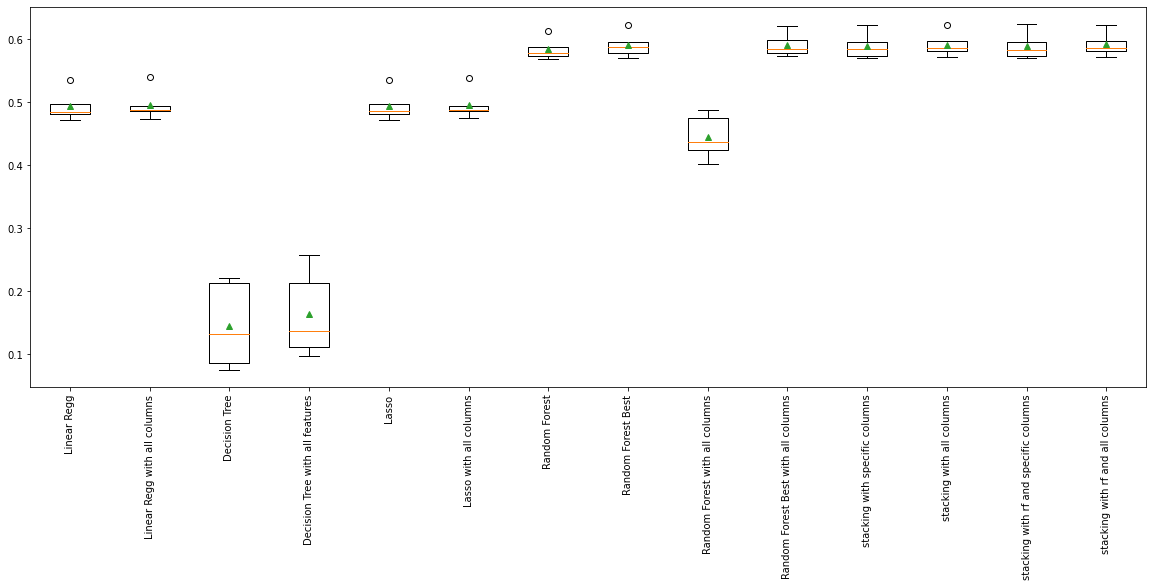

In [ ]:
plt.figure(figsize=(20,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
perf = [n_scores1.mean(), n_scores2.mean(), n_scores3.mean(), n_scores4.mean(), n_scores5.mean(), n_scores6.mean(), n_scores7.mean(), n_scores8.mean(), n_scores9.mean(), n_scores10.mean(), n_scores11.mean(), n_scores12.mean(), n_scores13.mean(), n_scores14.mean()]

In [ ]:
dict = {'Models': names, 'R2_Square': perf}
final = pd.DataFrame(dict)
final

,Models,R2_Square
0,Linear Regg,0.494124
1,Linear Regg with all columns,0.496217
2,Decision Tree,0.145582
3,Decision Tree with all features,0.163200
4,Lasso,0.494093
5,Lasso with all columns,0.496305
6,Random Forest,0.584207
7,Random Forest Best,0.591209
8,Random Forest with all columns,0.445188
9,Random Forest Best with all columns,0.591133


Conclusion:

The best suited algorithm for predicted the Sales is Stacking method with all columns.

In [ ]:
stacking1.fit(x1_train, y1_train)
stacking1.score(x1_train, y1_train)

0.6392428567488748

In [ ]:
y_pred = stacking1.predict(x1_test)

In [ ]:
r2_score(y1_test, y_pred)

0.6044454990171115

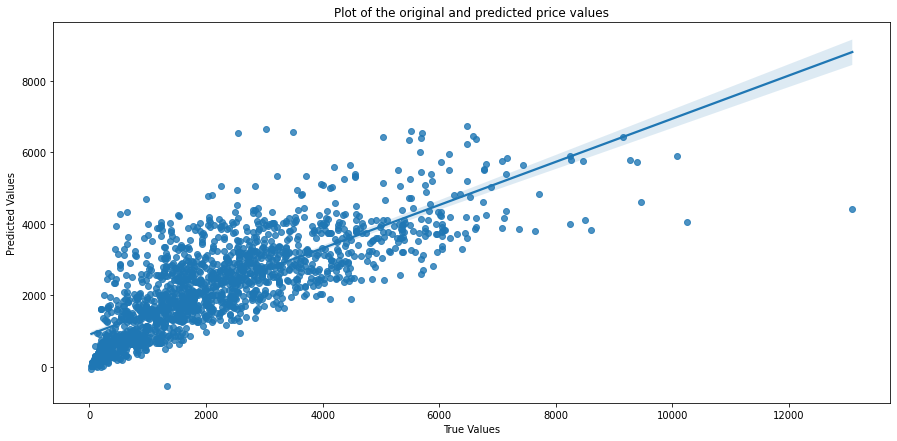

In [ ]:
plt.figure(figsize=(15,7))
sb.regplot(x=y1_test, y=y_pred);
plt.xlabel('True Values');
plt.ylabel('Predicted Values');
plt.title('Plot of the original and predicted price values');